# image captioning models

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.9 MB/s eta 0:00:00:00:0100:01


In [1]:
# tools
import glob
import math
def concatenate_images(path_image):

    # create a list of all image file names
    image_files = glob.glob(f"{path_image}/*.jpg")

    # create an empty list to store image objects
    images = []

    # loop through the image files and open them as image objects
    for file in image_files:
        img = Image.open(file)
        images.append(img)

    # calculate the dimensions of the output image
    num_images = len(images)
    cols = math.ceil(math.sqrt(num_images))
    rows = math.ceil(num_images / cols)
    max_width = max([img.size[0] for img in images])
    max_height = max([img.size[1] for img in images])
    out_width = max_width * cols
    out_height = max_height * rows

    # create a new image object to store the concatenated image
    concatenated_image = Image.new('RGB', (out_width, out_height), (255, 255, 255))

    # loop through the images and paste them into the concatenated image
    x_offset = 0
    y_offset = 0
    for img in images:
        concatenated_image.paste(img, (x_offset, y_offset))
        x_offset += max_width
        if x_offset >= out_width:
            x_offset = 0
            y_offset += max_height
    return concatenated_image

# Using git base Microsoft

In [5]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image
import torch
import pandas as pd

2023-05-07 17:17:34.401301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 17:17:35.033433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


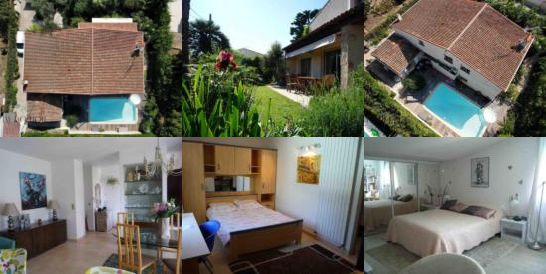

['property image # villa with swimming pool in the middle of olive trees and lavender', 'the front of the house', 'the house is on the market for $ 1. 5 million.', 'a living room with a couch, table and chairs.', 'a bedroom with a bed, a chair, and a rug.', 'a bedroom with a bed, a chair, a table and a chair.']


In [2]:

device ="cuda:2"
processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco").to(device)

house_id_path = "/home/alaassairi/classif/data/reduced_images/test/ann_11794173"

house_images = glob.glob(f"{house_id_path}/*jpg")
all_images = concatenate_images(house_id_path)
display(all_images)
images =[]
for path_image in house_images :
    image = Image.open(path_image)
    images.append(image)

pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(generated_caption)



In [3]:
question = "Classify the image : "
question = "How expensive is this house? :"
for path_image in house_images :
    image = Image.open(path_image)

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    input_ids = processor(text=question, add_special_tokens=False).input_ids
    input_ids = [processor.tokenizer.cls_token_id] + input_ids
    input_ids = torch.tensor(input_ids).unsqueeze(0)

    generated_ids = model.generate(pixel_values=pixel_values, input_ids=input_ids, max_length=50)
    print(processor.batch_decode(generated_ids, skip_special_tokens=True))

['how expensive is this house? : )']
['how expensive is this house? : )']
['how expensive is this house? : person has a pool and a pool in the middle of the house']
['how expensive is this house? : )']
['how expensive is this house? : )']
['how expensive is this house? : )']


# Using blip

In [ ]:
device = "cuda:1"

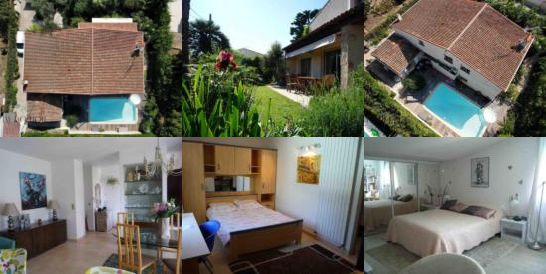

/home/alaassairi/anaconda3/envs/classif/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['a house with a pool in the middle of a neighborhood', 'a house with a garden and a patio', 'a house with a swimming pool in the middle of a garden', 'a living room with a couch, table and chairs', 'a bedroom with a bed and a desk', 'a bedroom with a bed and a chair']


In [30]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)







house_id_path = "/home/alaassairi/classif/data/reduced_images/test/ann_11794173"

house_images = glob.glob(f"{house_id_path}/*jpg")
all_images = concatenate_images(house_id_path)
display(all_images)
images = []
for path_image in house_images :
    image = Image.open(path_image)
    images.append(image)


# unconditional image captioning
inputs = processor(images, return_tensors="pt").to(device)

out = model.generate(**inputs)
outputs = [processor.decode(out[i], skip_special_tokens=True) for i in range(len(images))]



In [5]:
import pandas as pd

y_train_raw = pd.read_csv("../data/tabular/y_train_OXxrJt1.csv")

0it [00:00, ?it/s]

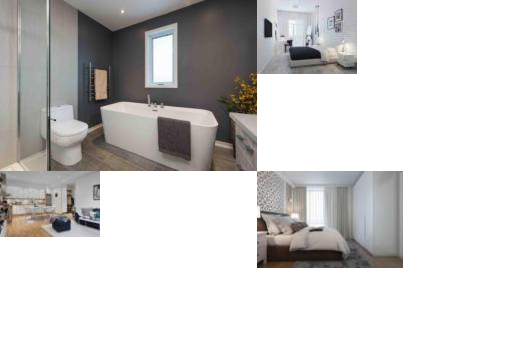

PRICE is : 355000.0
a bathroom with a tub, toilet, and a window.
a bedroom with a bed, chair, and pictures on the wall.
a living room with a couch and a table


1it [00:04,  4.92s/it]

a bedroom with a bed, window, and a rug.


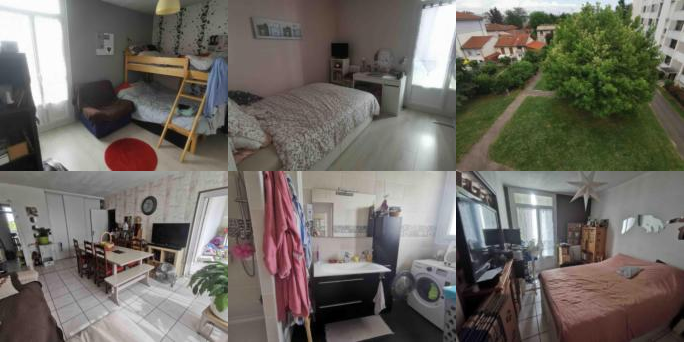

PRICE is : 190000.0
a bedroom with a bunk bed and a window.
a bedroom with a bed, a desk, and a window.
the tree in the middle of the park
a living room with a table and chairs
a bathroom with a sink, toilet and a bathtub.


2it [00:11,  5.87s/it]

a bedroom with a bed, desk, and window.


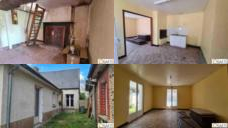

PRICE is : 39000.0
a ladder is leaning against a wall in a room.
a living room with a refrigerator and a stove
the house from the street


3it [00:15,  4.88s/it]

a room with a window and a door in it


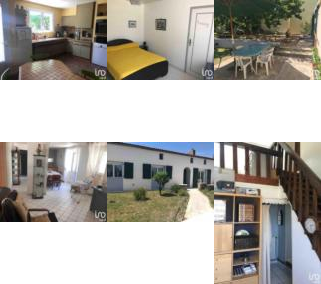

PRICE is : 299000.0
a kitchen with a refrigerator and a sink
the room is clean and ready for guests to use.
a pool with a table and chairs
a dining room table and chairs
property image # house in a quiet location


4it [00:20,  5.04s/it]

a wooden book shelf with a clock on it.


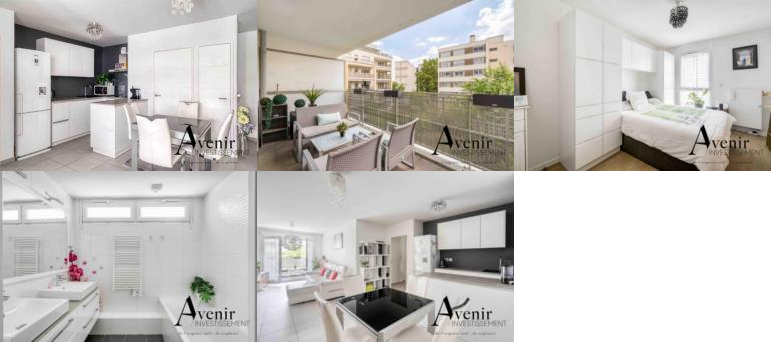

PRICE is : 478000.0
a kitchen with a table, chairs, and a table.
the apartment is on the second floor
a bedroom with a queen bed and a chandelier
a bathroom with a tub, sink, and a window.


4it [00:25,  6.46s/it]

a modern kitchen with a black and white theme


In [6]:
i=0

for id, row in y_train_raw.iterrows():
    base_path = "/home/alaassairi/classif/data/reduced_images/train/ann_"
    house_id_path =base_path + str(int(row["id_annonce"]))

    house_images = glob.glob(f"{house_id_path}/*jpg")
    all_images = concatenate_images(house_id_path)
    display(all_images)
    print(f"PRICE is : {row['price']}")
    for path_image in house_images :
        image = Image.open(path_image)

        pixel_values = processor(images=image, return_tensors="pt").pixel_values

        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        print(generated_caption)

    i+=1
    if i==5:
        break


# Running on all train set

In [3]:
import pandas as pd
import glob

In [27]:
house_id_path = "/home/alaassairi/classif/data/reduced_images/test/ann_11794173"
house_images = glob.glob(f"{house_id_path}/*jpg")


In [28]:
caption_df = pd.read_csv("../data/image_captions/df.csv")
caption_df

,id_annonce,features
0,35996577,"['a bathroom with a tub, toilet, and a window...."
1,35811033,"['a bedroom with a bunk bed and a window.', 'a..."
2,35731841,['a ladder is leaning against a wall in a room...
3,35886765,"['a kitchen with a refrigerator and a sink', '..."
4,35781137,"['a kitchen with a table, chairs, and a table...."
...,...,...
37363,35881571,"['three windows in a bathroom', 'a living room..."
37364,35890109,['a kitchen with a refrigerator and a window.'...
37365,36010245,"['a bedroom with a bed and a desk.', 'a door o..."
37366,35864579,"['a lamp that is on a table', 'a white bed pil..."


# Tokenization - Lemmatization

In [108]:
import re

# nltk packages
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from string import punctuation
import unidecode
# nltk.download('all')

In [110]:
caption_df = pd.read_csv("../data/image_captions/df.csv")
caption_df["features"]=caption_df.apply(lambda row :row["features"].replace("['","").replace("']","").replace("'",""), axis=1)
caption_df.head(100)


,id_annonce,features
0,35996577,"a bathroom with a tub, toilet, and a window., ..."
1,35811033,"a bedroom with a bunk bed and a window., a bed..."
2,35731841,"a ladder is leaning against a wall in a room.,..."
3,35886765,"a kitchen with a refrigerator and a sink, the ..."
4,35781137,"a kitchen with a table, chairs, and a table., ..."
...,...,...
95,35812899,"a planter on a building, view from the top of ..."
96,36004357,"a living room with a table and chairs, a kitch..."
97,30363665,"a bathroom with a sink, toilet and a shower., ..."
98,35902383,"a view of the pool from the living room., prop..."


In [111]:
# defining stopwords: using the one that comes with nltk + appending it with words seen from the above evaluation
stop_words = stopwords.words('english')
stop_append = ['[', "'",']', '.', ',', '`', '"', "'", '!', ';']
stop_words.extend(stop_append)

# list of word types (nouns and adjectives) to leave in the text
defTags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJS', 'JJR']#, 'RB', 'RBS', 'RBR', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

# functions to determine the type of a word
def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']


def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']


def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']


def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

    
# lemmatizer + tokenizer (+ stemming) class
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        # we define (but not use) a stemming method, uncomment the last line in __call__ to get stemming tooo
        self.stemmer = nltk.stem.SnowballStemmer('english') 
    def __call__(self, doc):
        # pattern for numbers | words of length=2 | punctuations | words of length=1
        pattern = re.compile(r'[0-9]+|\b[\w]{2,2}\b|[%.,_`!"&?\')({~@;:#}+-]+|\b[\w]{1,1}\b')
        
        # tokenize document
        doc_tok = word_tokenize(doc)

        #filter out patterns from words
        doc_tok = [x for x in doc_tok if x not in stop_words]
        doc_tok = [pattern.sub('', x) for x in doc_tok]

        # get rid of anything with length=1
        doc_tok = [x for x in doc_tok if len(x) > 1]

        # # position tagging
        doc_tagged = nltk.pos_tag(doc_tok)

        # # selecting nouns and adjectives
        doc_tagged = [(t[0], t[1]) for t in doc_tagged if t[1] in defTags]

        # # preparing lemmatization
        # doc = [(t[0], penn_to_wn(t[1])) for t in doc_tagged]
        
        # print(doc_tagged)
        # lemmatization
        doc = [self.wnl.lemmatize(t[0]) for t in doc_tagged]
        # print(doc)
        # uncomment if you want stemming as well
        doc = [self.stemmer.stem(x) for x in doc]
        return doc

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vec_tdidf = TfidfVectorizer(ngram_range=(1,2), analyzer='word', #stop_words=stop_words1, 
                                               norm='l2', tokenizer=LemmaTokenizer(), max_features=1000)

In [113]:
caption_df["features"].values

array(['a bathroom with a tub, toilet, and a window., a bedroom with a bed, chair, and pictures on the wall., a living room with a couch and a table, a bedroom with a bed, window, and a rug.',
       'a bedroom with a bunk bed and a window., a bedroom with a bed, a desk, and a window., the tree in the middle of the park, a living room with a table and chairs, a bathroom with a sink, toilet and a bathtub., a bedroom with a bed, desk, and window.',
       'a ladder is leaning against a wall in a room., a living room with a refrigerator and a stove, the house from the street, a room with a window and a door in it',
       ...,
       'a bedroom with a bed and a desk., a door on a building., a window on a building., a window on a building, a bed with pillows and pillows',
       'a lamp that is on a table, a white bed pillow, a bed with a white pillow, a window on a building, a white toilet in a room.',
       'a stone mailbox in the garden, a room with a window, a rug, a rug and a window.

In [114]:
X_train=vec_tdidf.fit_transform(caption_df["features"].values)

/home/alaassairi/anaconda3/envs/classif/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [105]:
vec_tdidf.get_feature_names_out()

array(['air', 'apart', 'apart build', 'apart center', 'apart citi',
       'apart live', 'apart market', 'apart rental', 'apart second',
       'area', 'area hous', 'babi', 'back', 'back hous', 'background',
       'background hous', 'backyard', 'balconi', 'balconi apart',
       'balconi balconi', 'balconi bathroom', 'balconi bedroom',
       'balconi hous', 'balconi kitchen', 'balconi live', 'balconi room',
       'balconi view', 'bar', 'barn', 'basement', 'basement hous', 'bath',
       'bath tub', 'bathroom', 'bathroom bathtub', 'bathroom blue',
       'bathroom glass', 'bathroom larg', 'bathroom mirror',
       'bathroom shower', 'bathroom sink', 'bathroom toilet',
       'bathroom tub', 'bathroom white', 'bathroom window', 'bathtub',
       'bathtub bathroom', 'bathtub bedroom', 'bathtub kitchen',
       'bathtub live', 'bathtub room', 'beach', 'beauti', 'bed',
       'bed bathroom', 'bed bedroom', 'bed blue', 'bed chair', 'bed desk',
       'bed dresser', 'bed hous', 'bed kitche

['a large room with a long couch and a table', 'a living room with a couch, chair and a table.', 'a bathroom with a tub and a sink', 'a kitchen with a table and chairs and a window', 'a bed in a blue room with a window.', 'a man sitting in a living room with a table and chairs.']


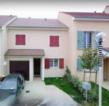

In [22]:
# bed
# room
# living room
# bedroom
row = 11
id_image=caption_df.iloc[row]["id_annonce"]
id_image = 35835335
house_id_path = f"/home/alaassairi/classif/data/reduced_images/train/ann_{id_image}"
all_images = concatenate_images(house_id_path)
print(caption_df.iloc[row]["features"])
display(all_images)